In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [33]:
df = pd.read_csv('flowers.csv')

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [34]:
df = df.drop(columns=['species'])

df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


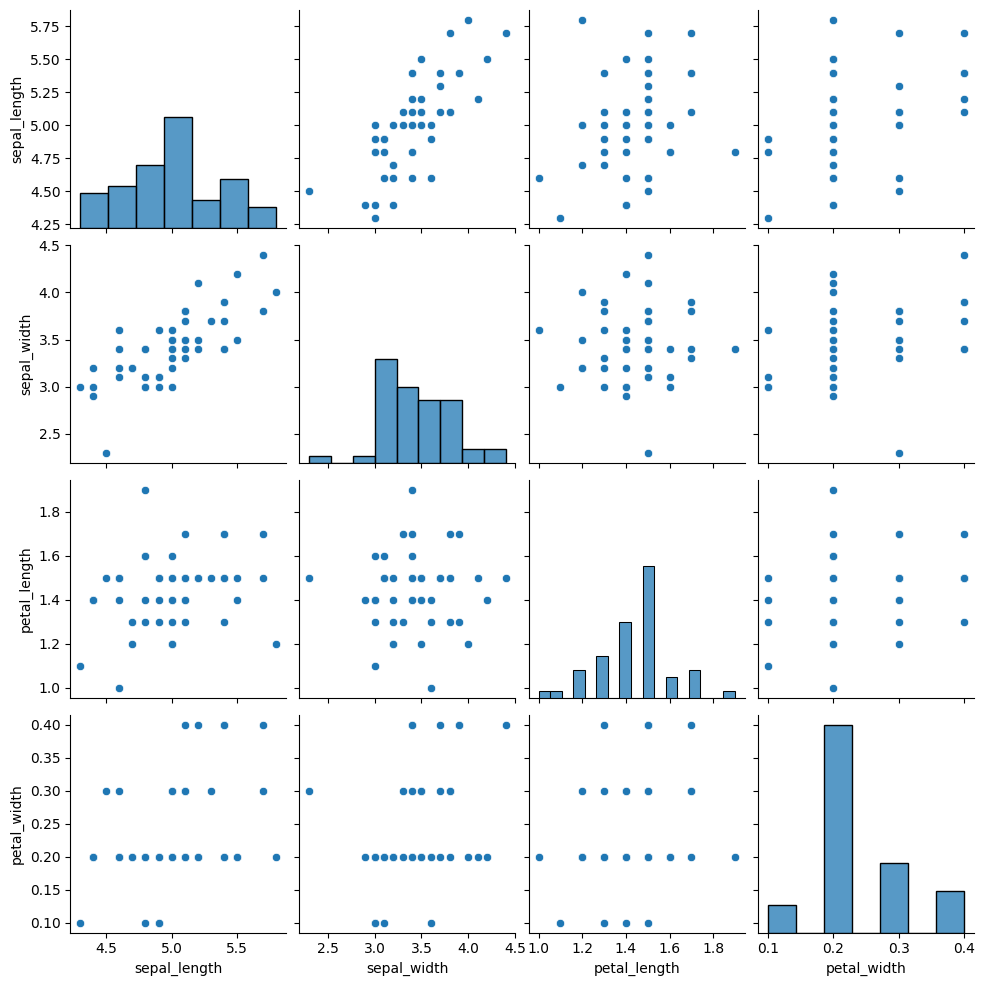

In [35]:
sns.pairplot(df)

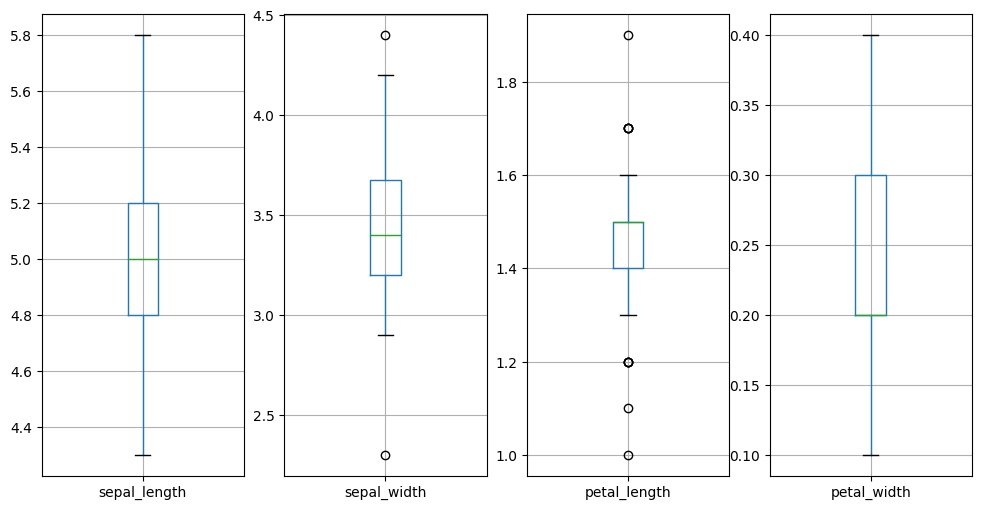

In [36]:
variables = ['sepal_length','sepal_width','petal_length','petal_width']

n_vars = len(variables)

fig, axes = plt.subplots(ncols=n_vars, figsize=(12,6))



for i, var in enumerate(variables):
    ax = axes[i]
    df.boxplot(column=var, ax=ax)

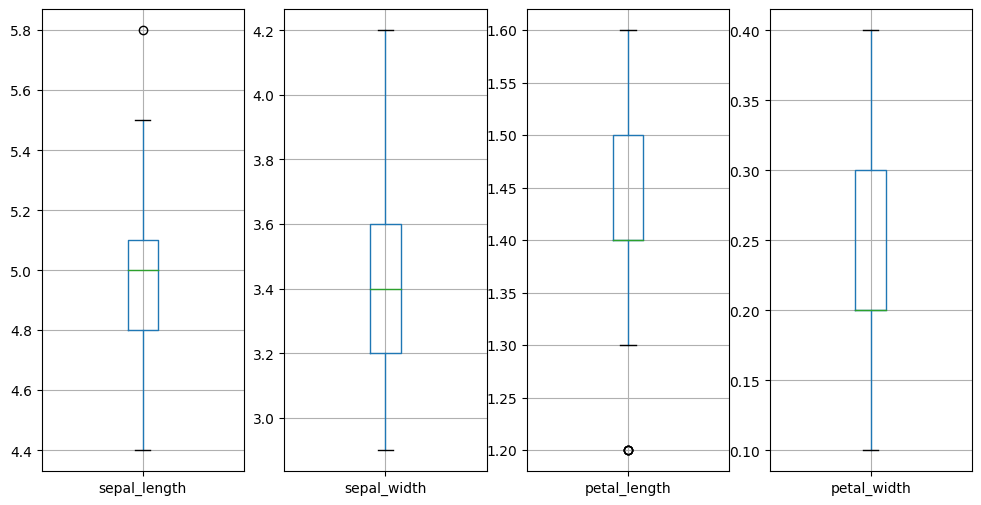

In [37]:
def remove_IQR(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[column] > lower_bound) & (df[column] < upper_bound)]
    return df

columns_to_check = ['sepal_width', 'sepal_length', 'petal_width', 'petal_length']
df_cleaned = remove_IQR(df, columns_to_check)


variables = ['sepal_length','sepal_width','petal_length','petal_width']

n_vars = len(variables)

fig, axes = plt.subplots(ncols=n_vars, figsize=(12,6))



for i, var in enumerate(variables):
    ax = axes[i]
    df_cleaned.boxplot(column=var, ax=ax)

In [38]:
# variables = ['Region','Species','Behavior','Habitat Preference','Trophic Level']

# for var in variables:
#     values = df[var].value_counts()
#     values.plot(kind='bar')
#     plt.show()

In [39]:
from sklearn.preprocessing import MinMaxScaler

df = df_cleaned

minmax = MinMaxScaler()

df[['sepal_length','sepal_width','petal_length','petal_width']] = minmax.fit_transform(df[['sepal_length','sepal_width','petal_length','petal_width']])

df.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,41.000000,41.000000,41.000000,41.000000
mean,0.425087,0.401501,0.554878,0.430894
std,0.221285,0.250155,0.276768,0.249932
min,0.000000,0.000000,0.000000,0.000000
25%,0.285714,0.230769,0.500000,0.333333
50%,0.428571,0.384615,0.500000,0.333333
75%,0.500000,0.538462,0.750000,0.666667
max,1.000000,1.000000,1.000000,1.000000


In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

df = pd.DataFrame(pca.fit_transform(df),columns=['PC1','PC2'])

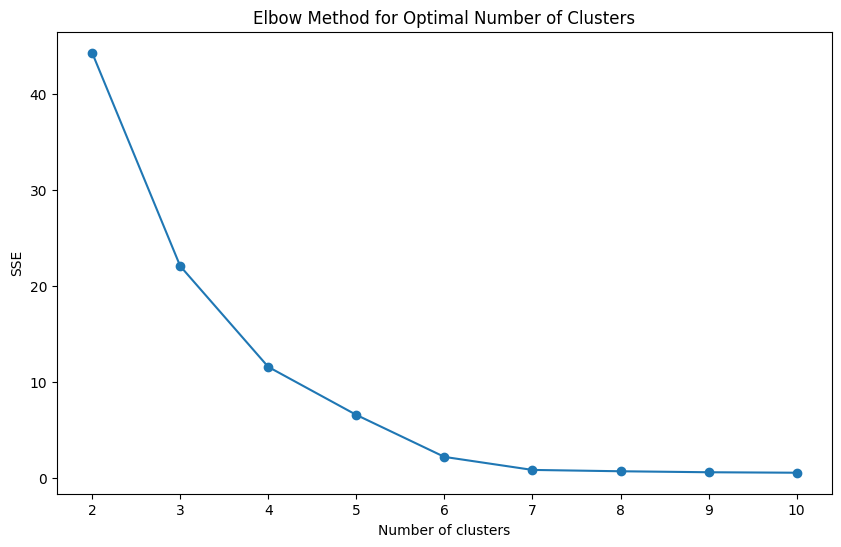

In [49]:
from sklearn.cluster import KMeans

sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


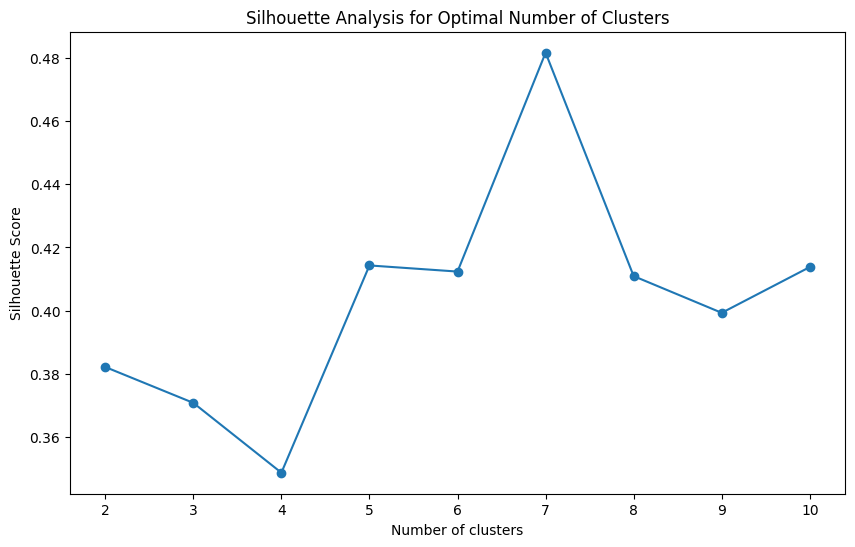

In [42]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(df, labels))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal Number of Clusters')
plt.show()

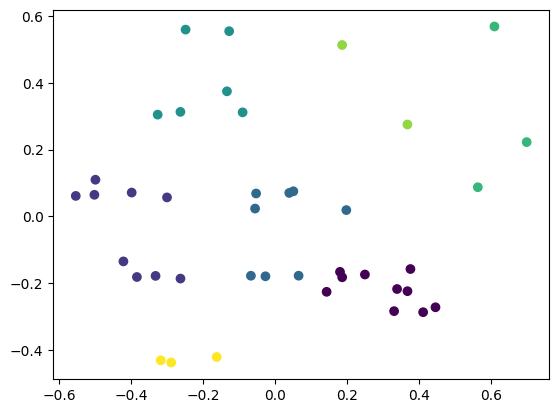

In [48]:
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=7)

cls = kmeans.fit(df)

df['Cluster'] = cls.labels_

plt.scatter(df['PC1'],df['PC2'],c=df['Cluster'])

plt.show()
